<a href="https://colab.research.google.com/github/pachterlab/MBGBLHGP_2019/blob/master/notebooks/wctime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!date

Wed Jun 12 17:13:33 PDT 2019


In [1]:
!git clone https://github.com/pachterlab/MBGBLHGP_2019.git

Cloning into 'MBGBLHGP_2019'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 595 (delta 14), reused 58 (delta 8), pack-reused 525
Receiving objects: 100% (595/595), 796.06 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (186/186), done.
Checking out files: 100% (234/234), done.


# Supplementary Figure 11

In [2]:
import glob
import pandas as pd
import numpy as np
import pandas as pd
import scipy as scp
import sklearn
import itertools
from scipy.optimize import fsolve

from collections import Counter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.figure_format = 'retina'

In [3]:
k1 = pd.read_csv("/content/MBGBLHGP_2019/data/wctime/time_kallisto_step1_bus.csv")
k2 = pd.read_csv("/content/MBGBLHGP_2019/data/wctime/time_kallisto_step2_correct_count.csv")

seq_depth=pd.read_csv("/content/MBGBLHGP_2019/data/wctime/seq_depth_stat.csv")
seq_depth.index = seq_depth["ID"]

wc = pd.read_csv("/content/MBGBLHGP_2019/data/wctime/time_word_count.csv")

In [4]:
k1.index=k1.ID
k2.index=k2.ID
k = k1 + k2
del k["ID"]

In [5]:
k = k.reset_index()

In [6]:
k["max_rss"] = pd.concat([k1["max_rss"], k2["max_rss"]], axis=1).max(axis=1).values

In [7]:
k.s[0] == k1.s[0] + k2.s[0]

True

In [8]:
k["reads"] = k.ID.map(seq_depth["reads"])

In [9]:
wc["reads"] = wc.ID.map(seq_depth["reads"])

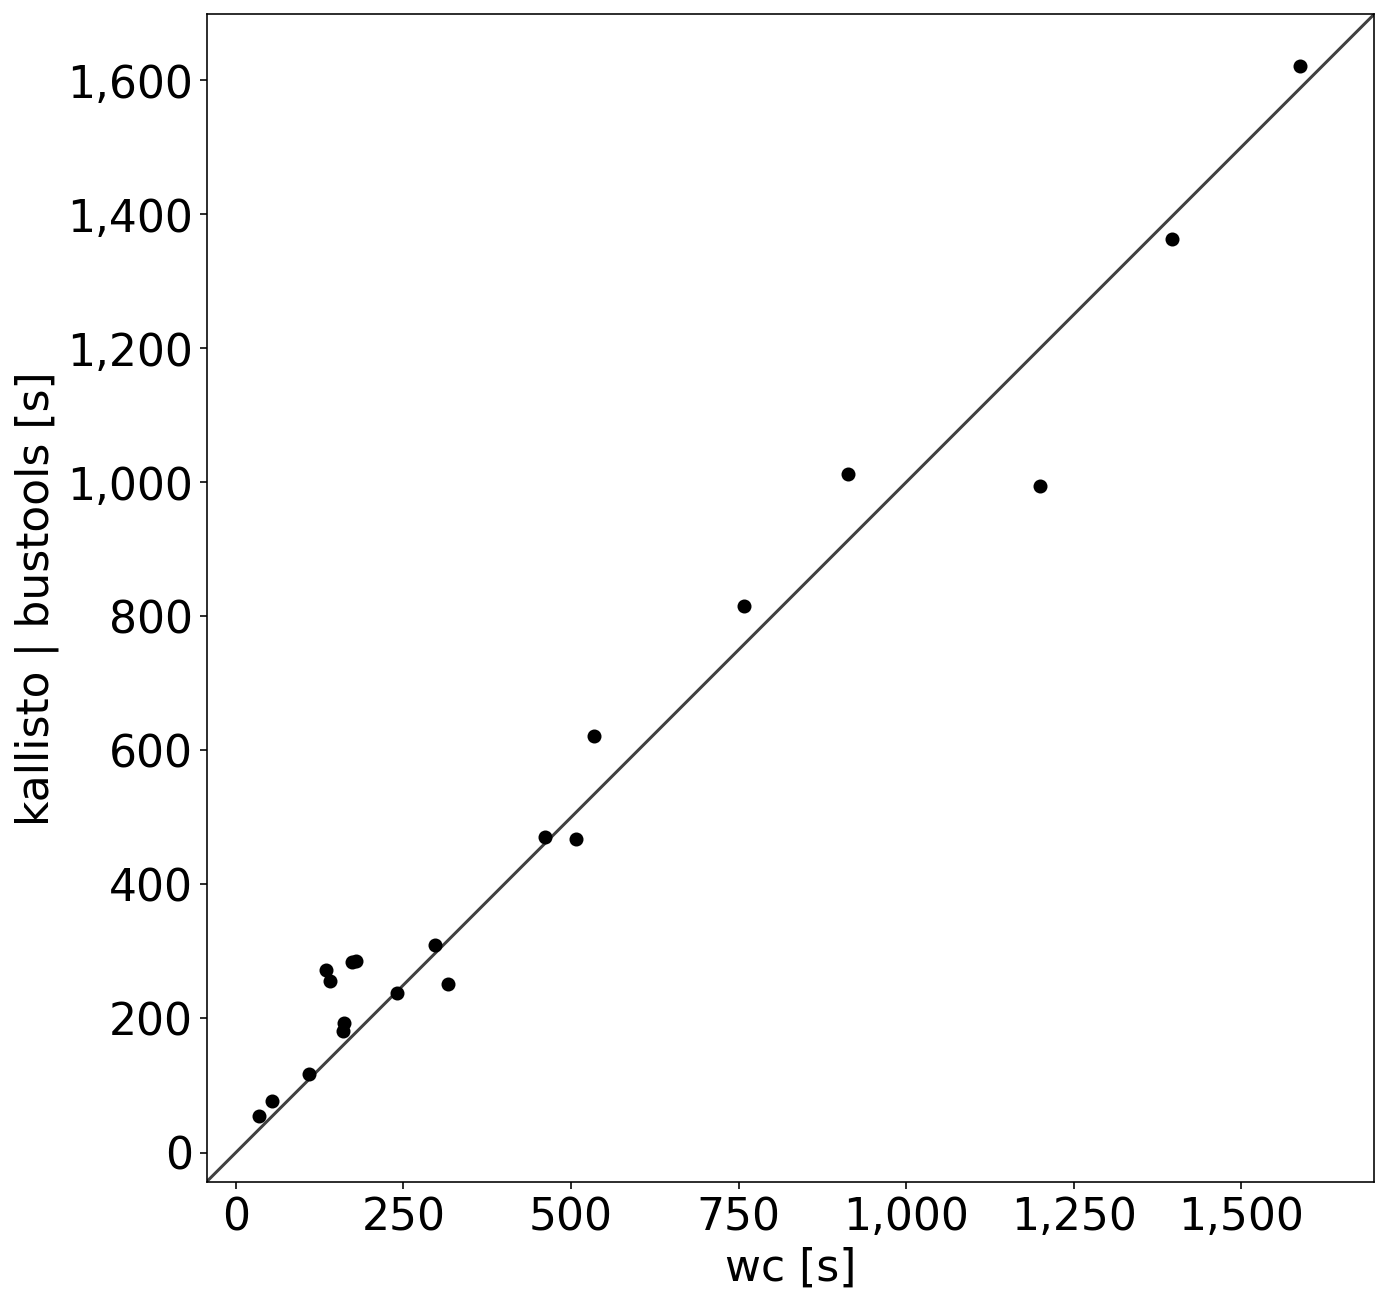

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(wc["s"], k["s"], color="k")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("wc [s]")
ax.set_ylabel("kallisto | bustools [s]")
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig("wc_runtime.pdf")
plt.show()

In [11]:
wc

,ID,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,reads
0,EMTAB7320_v2,1199.8762,0:19:59,2.98,220.73,0.73,0.76,42289.98,78.77,0,335147976
1,heart1k_v2,179.2501,0:02:59,2.98,220.73,0.73,0.75,5366.95,0.00,0,88872840
2,heart1k_v3,172.5408,0:02:52,2.99,220.73,0.73,0.76,5380.52,0.00,0,84512390
3,hgmm10k_v3,1587.5992,0:26:27,3.02,220.73,0.73,0.76,49111.47,535.31,0,721180737
4,hgmm1k_v2,161.4742,0:02:41,2.99,220.73,0.73,0.76,4230.79,11.63,0,75225120
5,hgmm1k_v3,134.1158,0:02:14,2.98,220.73,0.73,0.76,3393.29,5.50,0,63105786
6,neuron10k_v3,757.4404,0:12:37,2.99,220.73,0.73,0.76,22771.28,11.06,0,357111595
7,pbmc10k_v3,1396.9626,0:23:16,3.02,220.73,0.73,0.76,44169.16,33.50,0,638901019
8,pbmc1k_v3,140.7343,0:02:20,2.98,220.73,0.70,0.74,4683.15,0.00,0,66601887
9,SRR6956073_v2,296.7755,0:04:56,2.99,220.74,0.73,0.76,10730.41,0.00,0,161274652


In [12]:
k

,ID,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,reads
0,EMTAB7320_v2,994.4588,0:14:180:02:16,3539.60,7665.74,6935.64,6936.63,42655.92,13799.55,0,335147976
1,heart1k_v2,285.1943,0:04:080:00:36,3482.91,7660.74,6875.66,6876.68,7132.03,1812.71,0,88872840
2,heart1k_v3,283.7067,0:02:280:02:14,11089.57,15991.73,14567.84,14568.83,5247.34,1659.21,0,84512390
3,hgmm10k_v3,1620.3424,0:19:560:07:04,11461.04,20136.83,18789.62,18790.60,49292.68,30749.70,0,721180737
4,hgmm1k_v2,193.5088,0:02:330:00:39,7264.75,11738.47,10954.49,10955.48,9431.13,1632.67,0,75225120
5,hgmm1k_v3,272.4029,0:02:120:02:19,11389.63,20069.80,18643.35,18644.33,3330.27,2358.64,0,63105786
6,neuron10k_v3,815.5114,0:09:320:04:02,11099.14,16000.32,14598.55,14599.54,22783.70,12977.17,0,357111595
7,pbmc10k_v3,1362.4017,0:17:500:04:51,11249.41,16327.08,14992.24,14993.23,47514.80,20242.26,0,638901019
8,pbmc1k_v3,256.3150,0:02:060:02:09,11194.99,16271.89,14856.13,14857.11,4058.87,1034.66,0,66601887
9,SRR6956073_v2,309.0004,0:04:050:01:03,3412.04,7485.21,6738.47,6739.45,11682.76,5281.75,0,161274652
